<center><h1>BASIC MODEL OF FACE MASK DETECTOR FOR COVID-19</h1></center>


For complete programme open the link 👉🏻 https://github.com/rajeshrishi/mask-detection-using-CNN-level-1

# The Dataset

The dataset consisted of 1376 images, 690 face images with masks and 686 without masks. 
<center><h1>Without Mask</h1></center>

<img src="https://raw.githubusercontent.com/rajeshrishi/mask-detection-using-CNN-level-1/main/download%20(1).jpg" layout="centre">
<center><h1>With Mask</h1></center>

<img src="https://raw.githubusercontent.com/rajeshrishi/mask-detection-using-CNN-level-1/main/download%20(2).jpg" layout="centre">


In [1]:
# Importing libraries
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import tensorflow as tf
import tensorflow.keras as keras

In [3]:
import os
# Path of the data set.
data_path='dataset'
categories = os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))

label_dict

{'with mask': 0, 'without mask': 1}

In [4]:
# Using for loop
data=[]
target=[]

for category in categories:
    # Path of the data set to access folder and image.
    folder_path=os.path.join(data_path,category)
    img_names= os.listdir(folder_path)
    
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        # Reading the image
        img=cv2.imread(img_path)
        
        try:
            # Convert the image into gray scale
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            # Resize the gray image
            resized=cv2.resize(gray,(100,100))
            data.append(resized)
            target.append(label_dict[category])
        
        except Exception as e:
            print('Exception:',e)

In [6]:
# Converting the image into number
import numpy as np

# Creating an array of number
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],100,100,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [7]:
# Saving the converted data in target
np.save('data',data)
np.save('target',new_target)

In [8]:
# Importing libraries for CNN model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [9]:
# initialiing the CNN
model = models.Sequential()

# step 1: convolution layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=data.shape[1:]))
# step 2: pooling layer 1
model.add(layers.MaxPooling2D((2, 2)))
# step 1: convolution layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# step 2: pooling layer 2
model.add(layers.MaxPooling2D((2, 2)))
# step 1: convolution layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# step 2: pooling layer 3
model.add(layers.MaxPooling2D((2, 2)))
# step 1: convolution layer 4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# step 2: pooling layer 4
model.add(layers.MaxPooling2D((2, 2)))

# step 3: flattening
model.add(layers.Flatten())

# step 4: full connection
# Hidden layer
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))

# Output Layer
model.add(layers.Dense(1, activation='sigmoid'))
# Sigmoid is used or binary classification

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

In [11]:
# Compiling
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [12]:
# Training and testing model selection
# Spliting the data into training and test set.
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)
# 10% data is used for testing and 90% data is used for training.

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Saving the model of checkpoint of every iteration 
checkpoint = ModelCheckpoint(
  'model-{epoch:03d}.model',
  monitor='val_loss',
  verbose=0,
  save_best_only=True,
  mode='auto')

history=model.fit(
  train_data,
  train_target,
  epochs=15,
  callbacks=[checkpoint],
  validation_split=0.2)


Epoch 1/15
31/31 [==============================] - 21s 679ms/step - loss: 0.5947 - acc: 0.6960 - val_loss: 0.5541 - val_acc: 0.7339
Epoch 2/15
31/31 [==============================] - 19s 627ms/step - loss: 0.5498 - acc: 0.7384 - val_loss: 0.4719 - val_acc: 0.7782
Epoch 3/15
31/31 [==============================] - 20s 634ms/step - loss: 0.4950 - acc: 0.7788 - val_loss: 0.4231 - val_acc: 0.8185
Epoch 4/15
31/31 [==============================] - 20s 637ms/step - loss: 0.4395 - acc: 0.8192 - val_loss: 0.3604 - val_acc: 0.8871
Epoch 5/15
31/31 [==============================] - 16s 529ms/step - loss: 0.3628 - acc: 0.8616 - val_loss: 0.3781 - val_acc: 0.7823
Epoch 6/15
31/31 [==============================] - 17s 550ms/step - loss: 0.3151 - acc: 0.8838 - val_loss: 0.2556 - val_acc: 0.9113
Epoch 7/15
31/31 [==============================] - 20s 637ms/step - loss: 0.2910 - acc: 0.8838 - val_loss: 0.2314 - val_acc: 0.9194
Epoch 8/15
31/31 [==============================] - 20s 636ms/step - 

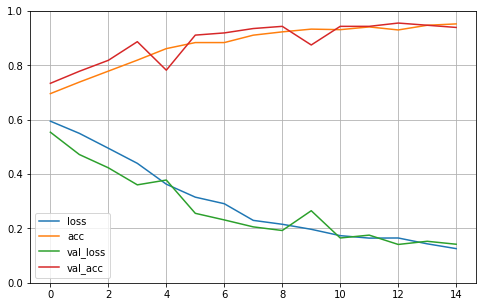

<Figure size 576x432 with 0 Axes>

In [16]:
# Plotting loss, accuracy, validation loss and validation accuracy.
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


figure = plt.gcf() 
figure.set_size_inches(8, 6) 

plt.savefig('loss_accuracy_graph.png',dpi=300, bbox_inches='tight')

In [45]:
# Saving our model
model.save("model_v3.h5")

In [17]:
# Checking the accuracy of model.
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 105ms/step - loss: 0.1112 - acc: 0.9565
[0.11119876056909561, 0.95652174949646]


### Accuracy : 95.65%

In [22]:
# Taking five data for predicting
new=test_data[:5]

In [23]:
# Predicting the data
y_pred = model.predict_classes(new)

print(y_pred)
print(label_dict)

[[1]
 [0]
 [1]
 [0]
 [0]]
{'with mask': 0, 'without mask': 1}


AxesImage(54,36;334.8x217.44)


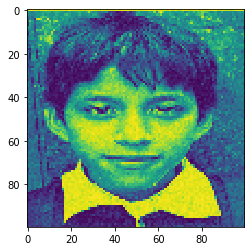

In [24]:
# Checking whether prediction is correct or not.
# Printing the 1st predicted image
print(plt.imshow(test_data[0].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


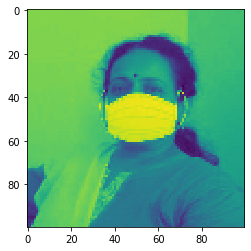

In [25]:
# Printing the 2nd predicted image
print(plt.imshow(test_data[1].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


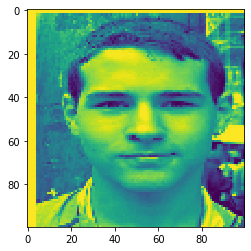

In [26]:
# Printing the 3rd predicted image
print(plt.imshow(test_data[2].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


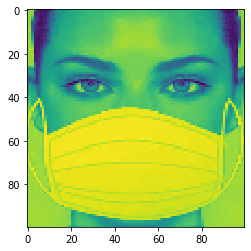

In [27]:
# Printing the 4th predicted image
print(plt.imshow(test_data[3].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


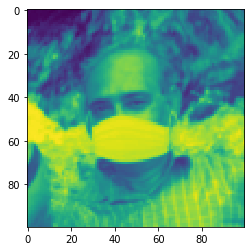

In [28]:
# Printing the 5th predicted image
print(plt.imshow(test_data[4].reshape(100,100)))